In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [3]:
print(boston.data.shape)

(506, 13)


In [4]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [5]:
import pandas as pd
bos_data = pd.DataFrame(boston.data)
print(bos_data.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11    12  
0  396.90  4.98  
1  396.90  9.14  
2  392.83  4.03  
3  394.63  2.94  
4  396.90  5.33  


In [6]:
print(bos_data.columns.values)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [7]:
bos_data['PRICE'] = boston.target
X = bos_data.drop('PRICE', axis = 1)
Y = bos_data['PRICE']

In [8]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [9]:
train_data, test_data, train_y, test_y=train_test_split(X, Y, test_size=0.33, random_state=5)

In [10]:
# applying column standardization on train and test data

s=StandardScaler()
train_data=s.fit_transform(np.array(train_data))
test_data=s.transform(np.array(test_data))

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=None,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, validation_fraction=0.1,
       verbose=0, warm_start=False

# 1.1.learning_rate='constant', eta0=0.01, n_iter=1

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


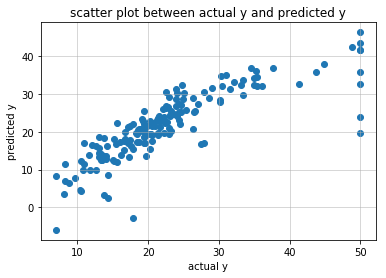

--------------------------------------------------
mean sq error= 29.64490347453407


In [13]:
clf = linear_model.SGDRegressor(alpha=0.0001, learning_rate='constant', eta0=0.01, n_iter=1)
clf.fit(train_data,train_y )
y_pred=clf.predict(test_data)
#scatter plot
plt.scatter(test_y,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-'*50)
sgd_error=mean_squared_error(test_y,y_pred)
print('mean sq error=', sgd_error)


# 1.2.learning_rate='constant', eta0=0.01, n_iter=10

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


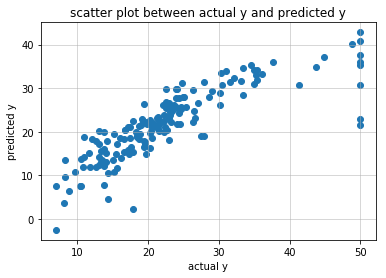

--------------------------------------------------
mean sq error= 28.779442623767302


In [22]:
clf = linear_model.SGDRegressor(alpha=0.0001, learning_rate='constant', eta0=0.01, n_iter=10)
clf.fit(train_data,train_y )
y_pred=clf.predict(test_data)
#scatter plot
plt.scatter(test_y,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-'*50)
sgd_error=mean_squared_error(test_y,y_pred)
print('mean sq error=', sgd_error)

# 1.3.learning_rate='constant', eta0=0.01, n_iter=100

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


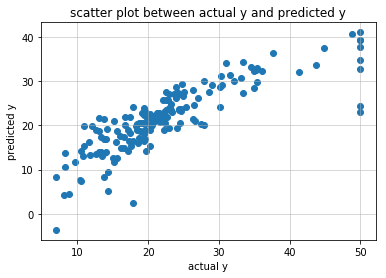

--------------------------------------------------
mean sq error= 28.41010775945057


In [18]:
clf = linear_model.SGDRegressor(alpha=0.0001, learning_rate='constant', eta0=0.01, n_iter=100)
clf.fit(train_data,train_y )
y_pred=clf.predict(test_data)
#scatter plot
plt.scatter(test_y,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-'*50)
sgd_error=mean_squared_error(test_y,y_pred)
print('mean sq error=', sgd_error)

# 1.4.learning_rate='constant', eta0=0.01, n_iter=1000

C:\Users\Bhumiben.Patel\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


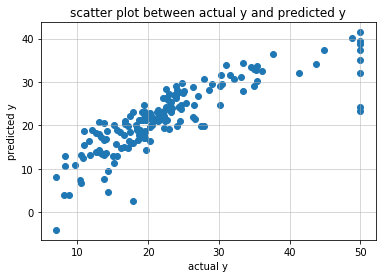

--------------------------------------------------
mean sq error= 27.952929944877948


In [17]:
clf = linear_model.SGDRegressor(alpha=0.0001, learning_rate='constant', eta0=0.01, n_iter=1000)
clf.fit(train_data,train_y )
y_pred=clf.predict(test_data)
#scatter plot
plt.scatter(test_y,y_pred)
plt.title('scatter plot between actual y and predicted y')
plt.xlabel('actual y')
plt.ylabel('predicted y')
plt.grid(b=True, linewidth=0.5)
plt.show()
print('-'*50)
sgd_error=mean_squared_error(test_y,y_pred)
print('mean sq error=', sgd_error)

# Now we will create the SGD function and check result for that 

In [31]:
#https://towardsdatascience.com/linear-regression-using-gradient-descent-in-10-lines-of-code-642f995339c0
#https://machinelearningmastery.com/implement-linear-regression-stochastic-gradient-descent-scratch-python/
#function return weight w and bias b
def sgd_fit(X, learning_rate, alpha=0.0001, eta0=0.01, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=eta0
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_gradien=np.zeros(shape=(1,13))
        b_gradien=0
        
       
        
        for i in range(10):  # to get the derivatives using sgd with k=10
            y_curr=np.dot(w_old,X[i])+b_old
            w_gradien+=X[i]*(Y[i]-y_curr)
            b_gradien+=(Y[i]-y_curr)
            
        w_gradien*=(-2/X.shape[0])
        b_gradien*=(-2/X.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_gradien)
        b_new=(b_old-r*b_gradien)
        
        if(learning_rate=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new

#function pridict the y value
def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)

#fuction drow graph betn test data and pridicted dataand print Mean square error
def plot(test_data,y_pred):
    plt.scatter(test_y,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('-'*50)
    manual_error=mean_squared_error(test_y,y_pred)
    print('error=',manual_error)
    
    return manual_error


# 2.1.learning_rate='constant', eta0=0.01, n_iter=1

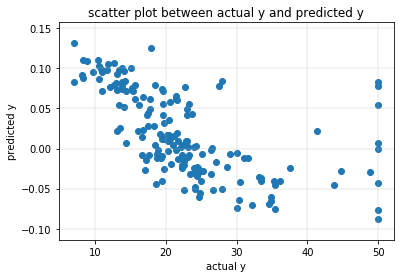

--------------------------------------------------
error= 600.8256726618802


In [32]:
w,b=sgd_fit(X=train_data, learning_rate='constant', n_iter=1)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot(test_data,y_pred)


# 2.2.learning_rate='constant', eta0=0.01, n_iter=10

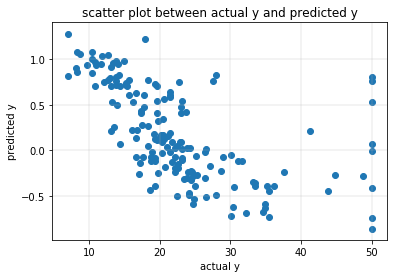

--------------------------------------------------
error= 598.8377281608438


In [35]:
w,b=sgd_fit(X=train_data, learning_rate='constant', n_iter=10)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot(test_data,y_pred)

# 2.3.learning_rate='constant', eta0=0.01, n_iter=100

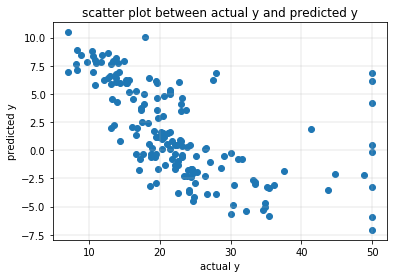

--------------------------------------------------
error= 592.905983189834


In [36]:
w,b=sgd_fit(X=train_data, learning_rate='constant', n_iter=100)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot(test_data,y_pred)


# 2.4.learning_rate='constant', eta0=0.01, n_iter=1000

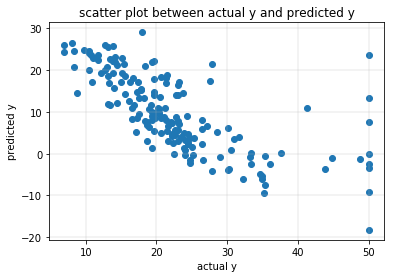

--------------------------------------------------
error= 462.4026799100243


In [37]:
w,b=sgd_fit(X=train_data, learning_rate='constant', n_iter=1000)
y_pred=pred(test_data, w=w, b=b)
manual_error=plot(test_data,y_pred)